In [ ]:
import pandas as pd
import numpy as np
import io


In [ ]:
from google.colab import files

In [ ]:
upload=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
df=pd.read_csv(io.BytesIO(upload['Social_Network_Ads.csv']))
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [ ]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
# accuracy=TP+TN/total
#satistical summary of dataframes
df.describe()


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


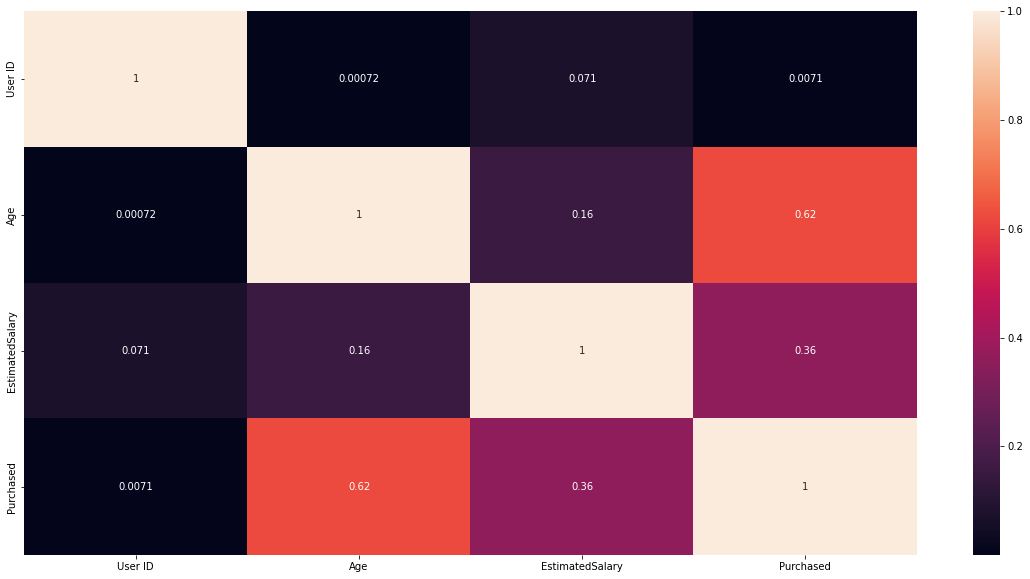

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
X=pd.DataFrame(np.c_[df['Age'],df['EstimatedSalary']],columns=['Age','EstimatedSalary'])
Y=df['Purchased']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train.shape)

(300, 2)
(100, 2)
(100,)
(300,)


In [ ]:
from sklearn.linear_model import LogisticRegression
regressive=LogisticRegression()
regressive.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_predict=regressive.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_predict)

0.84

In [ ]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.84      0.76      0.80        42

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100



In [ ]:
from sklearn.metrics import confusion_matrix
c_mat=confusion_matrix(Y_test,y_predict)
print(c_mat)

[[52  6]
 [10 32]]


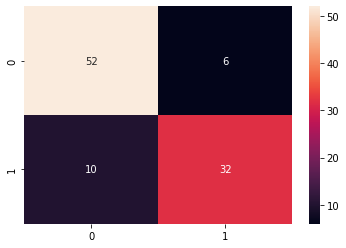

In [ ]:
sns.heatmap(c_mat,annot=True)
plt.show()